# Pearson Co-Relation

Removing perfect strongly corelated and perfect negative co0related values <br/>
Note : If a independent feature(Y) is highly corelated with dependent feature(X) : we do not have to remove those features because those features can play a very important role when we are training our ML models

<b>but</b>  if the dependent features is highly co-related with each other then from that we can use 1 by dropping the others

In [1]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
#loading data set from Sklearn. dataset
from sklearn.datasets import load_breast_cancer

In [3]:
#creating object
cancer= load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#feature Names : column names for pandas
#data : all X value
#target_names : all y values
#WDBC-Malignant : cancerous
#WDBC-Benign : damaged cell but non cancerous
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
#defining X & Y
x=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
y=pd.DataFrame(cancer['target'], columns=['type'])

In [7]:
#split dataset into train and test
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [9]:
x_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.338925,0.997895,0.986960,0.186711,0.521134,0.684077,0.826319,0.147766,-0.300793,...,0.968218,0.316946,0.963971,0.938773,0.127001,0.436753,0.538812,0.749128,0.142379,0.016524
mean texture,0.338925,1.000000,0.343352,0.333866,-0.026617,0.230700,0.299943,0.298610,0.056149,-0.099050,...,0.368464,0.915119,0.372994,0.355345,0.068250,0.270833,0.296778,0.299291,0.081100,0.093530
mean perimeter,0.997895,0.343352,1.000000,0.986342,0.222819,0.571126,0.722537,0.854196,0.183516,-0.250807,...,0.968053,0.321087,0.969052,0.939150,0.156441,0.477908,0.574767,0.774687,0.169047,0.060136
mean area,0.986960,0.333866,0.986342,1.000000,0.194611,0.516498,0.695306,0.827866,0.152973,-0.269174,...,0.961285,0.304339,0.957811,0.957211,0.132473,0.415699,0.526093,0.726995,0.124791,0.016369
mean smoothness,0.186711,-0.026617,0.222819,0.194611,1.000000,0.663869,0.533665,0.564721,0.562699,0.575397,...,0.225031,0.026113,0.251612,0.218206,0.809428,0.490748,0.453291,0.515143,0.414506,0.511507
mean compactness,0.521134,0.230700,0.571126,0.516498,0.663869,1.000000,0.884983,0.840117,0.606128,0.563799,...,0.547850,0.236049,0.603278,0.522823,0.559620,0.864436,0.812482,0.813608,0.507758,0.684409
mean concavity,0.684077,0.299943,0.722537,0.695306,0.533665,0.884983,1.000000,0.924576,0.503480,0.342448,...,0.692145,0.292842,0.732904,0.680117,0.446439,0.759078,0.886122,0.856212,0.404496,0.521359
mean concave points,0.826319,0.298610,0.854196,0.827866,0.564721,0.840117,0.924576,1.000000,0.467840,0.176838,...,0.830888,0.297847,0.856311,0.809727,0.454193,0.689412,0.765351,0.907071,0.372471,0.386807
mean symmetry,0.147766,0.056149,0.183516,0.152973,0.562699,0.606128,0.503480,0.467840,1.000000,0.489140,...,0.185186,0.063671,0.220643,0.178266,0.426894,0.474840,0.436212,0.433069,0.707128,0.445894
mean fractal dimension,-0.300793,-0.099050,-0.250807,-0.269174,0.575397,0.563799,0.342448,0.176838,0.489140,1.000000,...,-0.245289,-0.087327,-0.194806,-0.223155,0.494706,0.448048,0.344008,0.177341,0.348095,0.775086


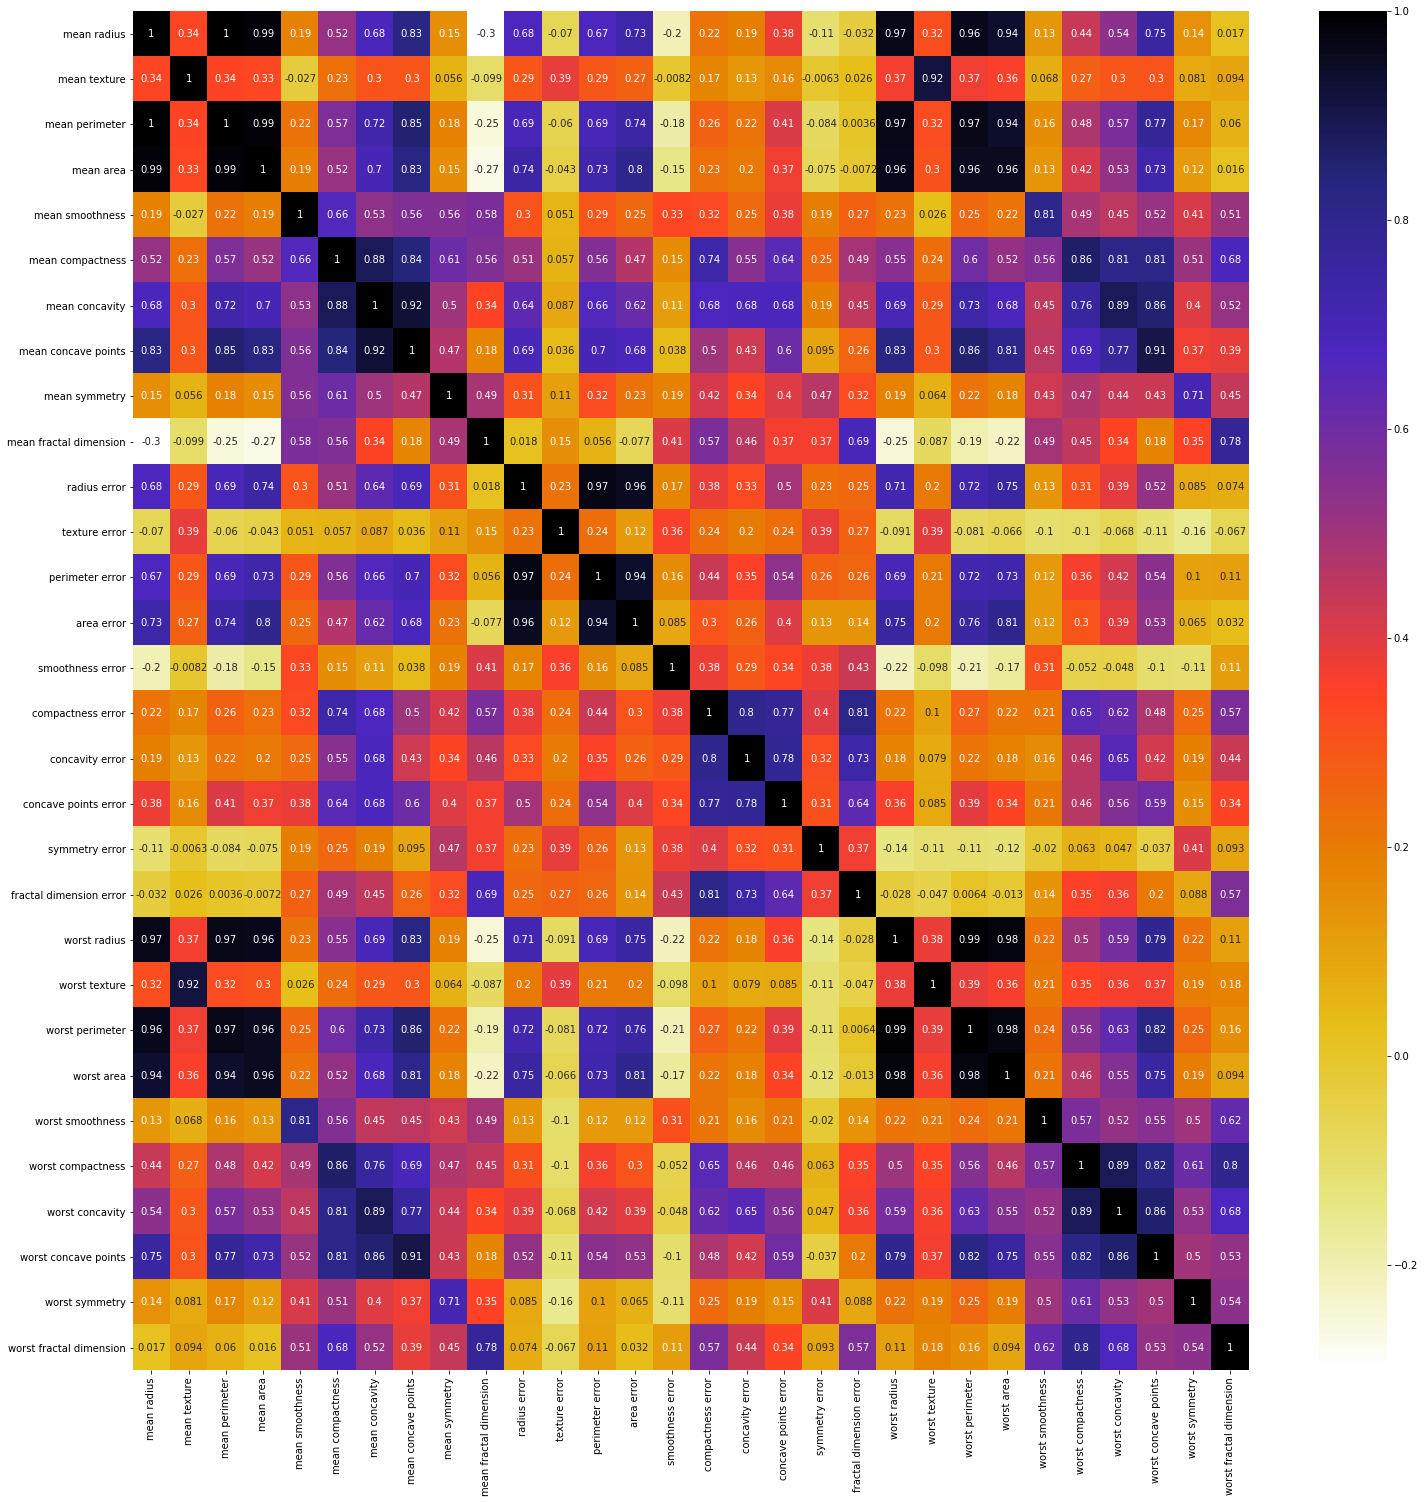

In [10]:
#Cheaking the co-relation using seaborn library
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
#abs method will highlight neg co-relation. If we remove abs method neg co-relation will be removed.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
#13 features are highly corelated. threshold is .85 
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

13

In [13]:
corr_features

{'area error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst perimeter',
 'worst radius',
 'worst texture'}

In [14]:
#droping highly corelated from x_train , x_test
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension
84,12.000,15.65,0.09723,0.07165,0.2079,0.05968,0.2271,1.2550,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,0.13770,0.3379,0.07924
214,14.190,23.81,0.09463,0.13060,0.2235,0.06433,0.4207,1.8450,0.010880,0.03710,0.03688,0.016270,0.04499,0.004768,0.15590,0.4724,0.10260
22,15.340,14.26,0.10730,0.21350,0.2521,0.07032,0.4388,0.7096,0.006789,0.05328,0.06446,0.022520,0.03672,0.004394,0.13900,0.4667,0.09946
518,12.880,18.22,0.12180,0.16610,0.1709,0.07253,0.4426,1.1690,0.005273,0.02329,0.01405,0.012440,0.01816,0.003299,0.14560,0.2582,0.08893
18,19.810,22.15,0.09831,0.10270,0.1582,0.05395,0.7582,1.0170,0.006494,0.01893,0.03391,0.015210,0.01356,0.001997,0.15120,0.2768,0.07615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,8.571,13.10,0.10360,0.07632,0.1678,0.07126,0.1267,0.6793,0.007897,0.01762,0.01801,0.007320,0.01592,0.003925,0.16410,0.2983,0.10490
369,22.010,21.90,0.10630,0.19540,0.1824,0.06140,1.0080,0.6999,0.003978,0.02821,0.03576,0.014710,0.01518,0.003796,0.12940,0.2741,0.08574
364,13.400,16.95,0.07937,0.05696,0.1650,0.05701,0.1584,0.6124,0.004394,0.01250,0.01451,0.005484,0.01291,0.002074,0.12130,0.2741,0.07582
242,11.300,18.19,0.09592,0.13250,0.2054,0.07669,0.2428,1.6420,0.006663,0.05914,0.08880,0.013140,0.01995,0.008675,0.13470,0.3308,0.12970
